# Packages

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from domain.preprocessing import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Données

In [149]:
data = pd.read_csv("data/beer_reviews.csv")

# Analyses exploratoire

# Vue globale

* Les prémieres données

In [150]:
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


* La taille des données

In [151]:
data.shape

(1586614, 13)

* Infos sur les variables

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


Il y a quatres variables qualitative et 9 quantitatives

* Valeurs manquanntes

In [153]:
var_categories(data)

{'Qualitatives': ['brewery_name',
  'review_profilename',
  'beer_style',
  'beer_name'],
 'Quantitatives': ['brewery_id',
  'review_time',
  'review_overall',
  'review_aroma',
  'review_appearance',
  'review_palate',
  'review_taste',
  'beer_abv',
  'beer_beerid']}

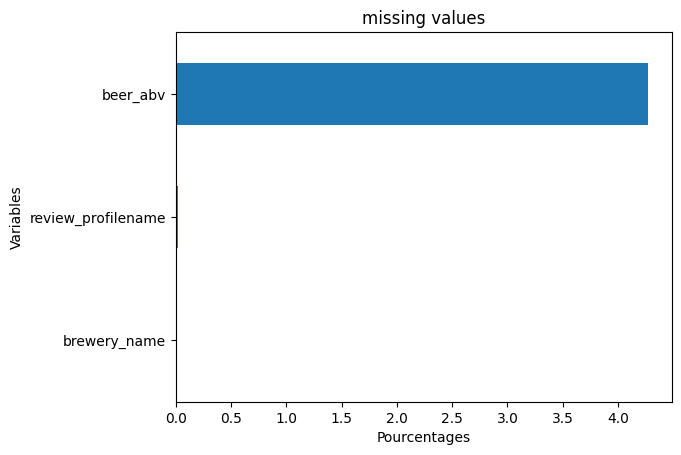

,Variable,Count,Percentage (%)
0,brewery_name,15,0.000945
1,review_profilename,348,0.021934
2,beer_abv,67785,4.272306


In [154]:
plot_missing_values(data)
missing_values(data)



## Analyse des brasseries

* Nombre de brasseries

In [155]:
data["brewery_id"].nunique()

5840

* ID des brasseries dont les noms sont manquants

In [156]:
na_brewery_name_id = data[data["brewery_name"].isna()].brewery_id.unique()
na_brewery_name_id

array([1193,   27])

* Essayons de retrouver les noms manquantes des brasseries en se basant sur l'historique

In [157]:
data[data["brewery_id"].isin(na_brewery_name_id)].brewery_name.unique()

array([nan], dtype=object)

Il est impossible de retrouver les noms manquants des brasseries sur la base de l'historique de leur ID

* Liens entre brewery_name et brewery_id

In [158]:
brewery_name_id_count = data[["brewery_id","brewery_name"]].drop_duplicates().\
                        groupby(by="brewery_name").\
                        agg(Count = ("brewery_id","count")).reset_index()
brewery_name_id_count = brewery_name_id_count[brewery_name_id_count["Count"]>1]
brewery_name_id_count.nunique()

brewery_name    59
Count            5
dtype: int64

Plusieurs brasseries peuvent avoir le meme nom.
Nous pensons que cela est dû aux brasseries possédant des filiales

* Liens entre beer_name et beer_beerid

In [159]:

beer_name_id_count = data[["beer_name","beer_beerid"]].drop_duplicates()\
.groupby(by="beer_name").agg(Count = ("beer_beerid","count")).reset_index()
beer_name_id_count = beer_name_id_count[beer_name_id_count["Count"]!=1]
beer_name_id_count.nunique()

beer_name    2705
Count          63
dtype: int64

Une biere (nom)  peut etre associé à plusieure beer_beerid.
Une brasserie est-t-elle associé à plusieurs beer_beerid?

* Liens entre brewery_id et beer_beer_id

In [160]:
data[["brewery_id","beer_beerid"]].nunique()

brewery_id      5840
beer_beerid    66055
dtype: int64

Une brasserie peut frabriquer plusieurs bieres différentes.

* Liens entre beer_beerid et brewery_id

In [182]:
beer_id_brewery_count = data[["beer_beerid","brewery_id"]].drop_duplicates()\
.groupby(by="beer_beerid").agg(Count = ("brewery_id","count")).reset_index()
beer_id_brewery_count = beer_id_brewery_count[beer_id_brewery_count["Count"]!=1]
beer_id_brewery_count.nunique()

beer_beerid    0
Count          0
dtype: int64

On remarque egalement que l'identifiant d'une bierre (beer_beerid) est associé à une unique brasserie.

* Liens entre beer_name et brewery_id

In [161]:
beer_brewery_count = data[["beer_name","brewery_id"]].drop_duplicates()\
.groupby(by="beer_name").agg(Count = ("brewery_id","count")).reset_index()
beer_brewery_count = beer_brewery_count[beer_brewery_count["Count"]>1]
beer_brewery_count
beer_brewery_count.nunique()

beer_name    2705
Count          63
dtype: int64

Plusieurs brasseries peuvent fabriquer des bieres portant le meme nom.

# Création de quelques variables

In [162]:
data["review_time"].dtypes

dtype('int64')

Au constat review_time est de type entier.Il serait donc intéressant de la transformer en date lisible.
Ce qui nous conduit à créer les nouvelles variables: date_time et year.

## creéation de date_time et year

In [163]:
print(date_time_year(data,"review_time"))

validate !


In [164]:
data[["date_time","year"]].head()

,date_time,year
0,2009-02-16 20:57:03,2009
1,2009-03-01 13:44:57,2009
2,2009-03-01 14:10:04,2009
3,2009-02-15 19:12:25,2009
4,2010-12-30 18:53:26,2010


# Reponses aux questions

Nous précisons que pour question, nous avons programmé une fonction dans domain/preprocessing.py

## 1- La brasserie frabiquant la bierre ayant le plus fort taux d'alcool

Nous avons programmé une fonction prenant en paramètre le dataFrame (df), la variable(var) dont on recherhe le max et l'année(year) de recherche. Par défaut year = 0 signifiant toutes les années confondues. NB = Lorsque l'année n'existe pas un message le précise.


In [165]:
strong_brewery(data,"beer_abv")

,brewery_id,brewery_name,beer_name,year,best_abv
12919,6513,Schorschbräu,Schorschbräu Schorschbock 57%,2011,57.7


La brasserie fraquant le plus fort taux d'alcool est Schorschbräu

## 2- Les trois meilleures bierres

* Recherches des 3 meilleures bierres en 2012

In [166]:
df = select_start_year(data,2012)

* Les 3 meilleires bierres en 2012 en fonction du nombre de notation

In [167]:
tmp,df1 = top_beers(df,2900)
df1

,brewery_id,brewery_name,beer_beerid,beer_name
76393,140,Sierra Nevada Brewing Co.,1904,Sierra Nevada Celebration Ale
1166284,10099,Dogfish Head Brewery,2093,90 Minute IPA
1242846,112,North Coast Brewing Co.,412,Old Rasputin Russian Imperial Stout


## 3 - Le facteur le plus important pour l'attribution de la note globale

In [168]:
corr, best_factor = most_influence_factor(data)

* Coefficients de corrélations de tous les facteurs avec review_overall

In [169]:
corr

,correlation_with_overall
review_taste,0.789816
review_palate,0.701914
review_aroma,0.616013
review_appearance,0.501732


Les facteurs les plus importants sont le goût(review_taste) et le palais (review_palate)

* Le factor le plus déterminant pour la note globale 

In [170]:
best_factor

,correlation_with_overall
review_taste,0.789816


Le gout est donc le facteur le plus déterminant pour la note globale

## 4 - Le meilleur style de bierre à recommander sur la base de l'arome et de l'apparance

* Selection de l'année de recherche

In [171]:
df_style = select_start_year(data,2012)

* Les meilleurs styles

In [172]:
style = best_beer_style(df_style,35000)

In [173]:
style

,beer_style,review_aroma,review_appearance
11,American Double / Imperial Stout,4.212436,4.205715
9,American Double / Imperial IPA,4.151349,4.106109
87,Russian Imperial Stout,4.096733,4.242708
12,American IPA,3.970508,4.016243


Le meilleure style des bières en 2012 est American Double / Imperial Stout 	

# FIN de l'exercice 